In [21]:
import pandas as pd
from fuzzywuzzy import fuzz
from collections import Counter
import re

# Read the CSV file
df = pd.read_csv('structured_guestlist.csv')

# Limit the DataFrame to 5000 rows
df = df.head(5000)

# Extract the 'Visitor' column
visitors = df['Visitor'].tolist()

# Preprocess the visitor names to remove punctuation and convert to lowercase
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

preprocessed_visitors = [preprocess(visitor) for visitor in visitors]

# Function to find similar visitors using token sort ratio
def find_similar_visitors(visitors, threshold=80):
    similar_pairs = []
    for i in range(len(visitors)):
        for j in range(i + 1, len(visitors)):
            similarity = fuzz.token_sort_ratio(visitors[i], visitors[j])
            if similarity >= threshold:
                similar_pairs.append((visitors[i], visitors[j], similarity))
    return similar_pairs

# Find similar visitors with a similarity threshold of 80
similar_visitors = find_similar_visitors(preprocessed_visitors, threshold=80)

# Create a mapping from each visitor to a canonical form
canonical_mapping = {}
for pair in similar_visitors:
    canonical_form = min(pair[0], pair[1], key=len)  # Choose the shorter name as the canonical form
    canonical_mapping[pair[0]] = canonical_form
    canonical_mapping[pair[1]] = canonical_form

# Ensure all visitors are in the mapping
for visitor in preprocessed_visitors:
    if visitor not in canonical_mapping:
        canonical_mapping[visitor] = visitor

# Count occurrences of each canonical form
visitor_counts = Counter()
for visitor in preprocessed_visitors:
    canonical_form = canonical_mapping[visitor]
    visitor_counts[canonical_form] += 1

# Create a new DataFrame from the counts
occurrences_df = pd.DataFrame(visitor_counts.items(), columns=['Visitor', 'Occurrences'])

# Sort the DataFrame by the number of occurrences in descending order
occurrences_df = occurrences_df.sort_values(by='Occurrences', ascending=False)

# Save the DataFrame to a CSV file without the index column
occurrences_df.to_csv("occurrences.csv", index=False)

# Display the DataFrame
print(occurrences_df)

                                           Visitor  Occurrences
51                                 3 landl 1 handw          189
50                                         2 landl           86
23                   leonhard fornaro von langnfee           76
14                                         1 handw           56
632           hr michael kern von bamberg f 3 muff           52
...                                            ...          ...
1211      georg meyer von müllenrütj im toggenburg            1
428   de vermenoux mr bernier mr neyville de paris            1
1209               2 fuhrmann aus dem schwabenland            1
1208  hr joh sprenger von vogtschloh im toggenburg            1
1219                jean veuilpiller de savoye f 4            1

[2257 rows x 2 columns]


/tmp/ipykernel_2909504/3354086682.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Occurrences', y='Visitor', data=top_25_df, palette='viridis')


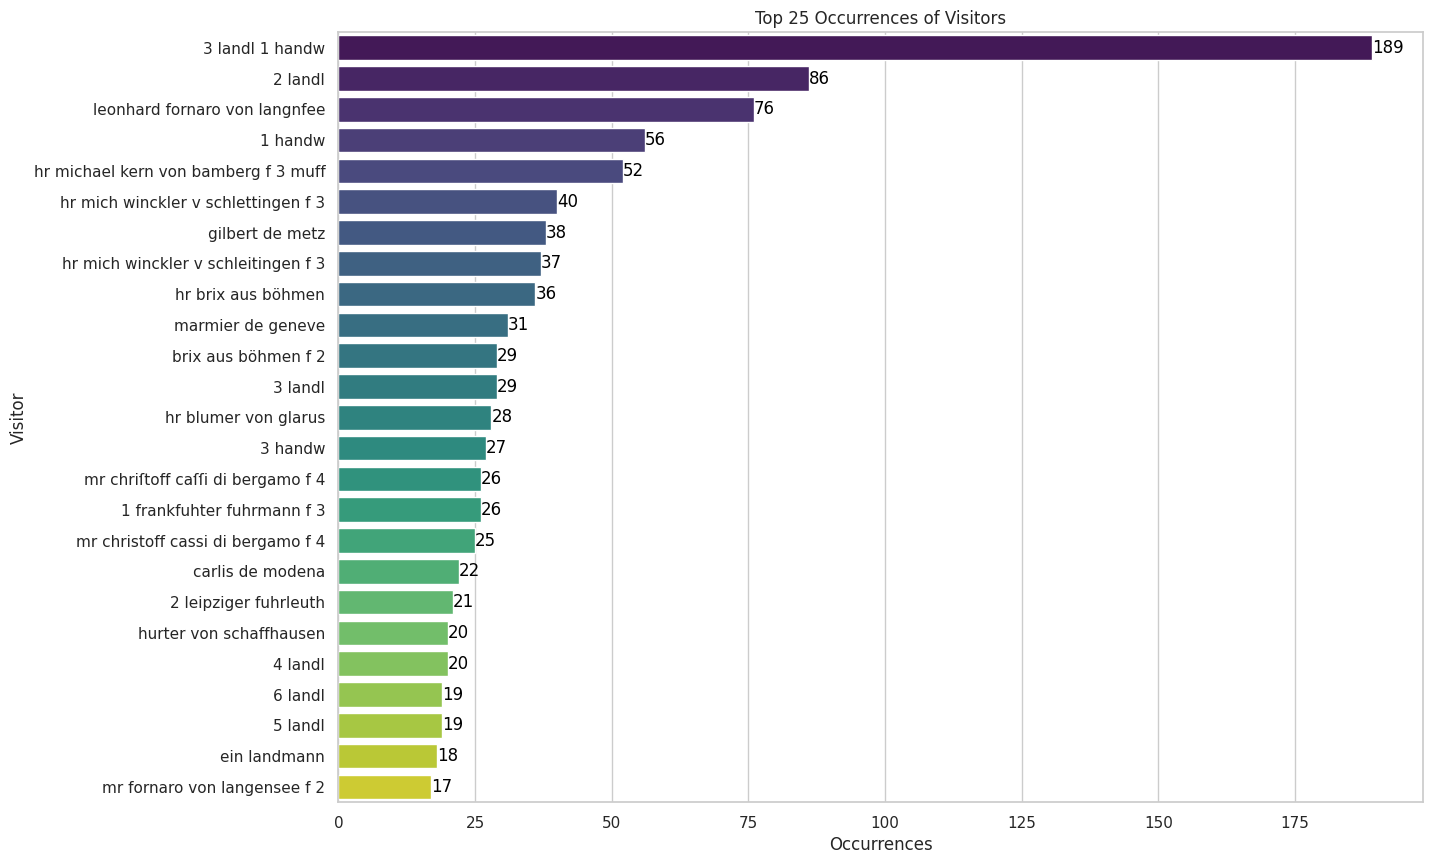

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the CSV file into a pandas DataFrame
df = pd.read_csv('occurrences.csv')

# Step 2: Sort the DataFrame by 'Occurrences' in descending order and select the top 25 entries
top_25_df = df.sort_values(by='Occurrences', ascending=False).head(25)

# Step 3: Plot the data using seaborn with enhanced aesthetics
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")
barplot = sns.barplot(x='Occurrences', y='Visitor', data=top_25_df, palette='viridis')

# Add value annotations to each bar
for index, value in enumerate(top_25_df['Occurrences']):
    barplot.text(value, index, f'{value}', color='black', ha="left", va="center")

plt.xlabel('Occurrences')
plt.ylabel('Visitor')
plt.title('Top 25 Occurrences of Visitors')

# Save the plot as a PNG file
plt.savefig('top_25_occurrences.png', bbox_inches='tight')

# Show the plot
plt.show()